## EMA crossover strategy

Exponential Moving Averages are widely used by traders to measure trend direction over a period of time. EMAs place a higher weight on recent data than on data, thus they are more reactive to the latest price changes as compared to Smooth Moving Averages.

The EMA crossover strategy involves using two EMAs with different timeframes to generate buy and sell signals. For this project, I will be testing with 9-day EMA and 21-day EMA. Feel free to try other timeframes. The stock I will be using is "SPY" and I will be backtesting from '2022-01-01' to '2023-01-01'.

This is how the strategy will work:
* When the 9-day EMA crosses above the 21-day EMA, it generates a buy signal.
* When the 9-day EMA crosses below the 21-day EMA, it generates a sell signal.

I will be comparing this strategy to a simple "buy and hold" strategy and see which strategy gives higher cumulatives returns.

In [165]:
pip install pandas_ta

In [166]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import pandas_ta as ta

# Retrieve stock prices

In [167]:
symbol = 'SPY'
df = yf.download(symbol, start="2022-01-01", end ="2023-01-01")
df.index = pd.to_datetime(df.index)
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,476.299988,477.850006,473.850006,477.709991,464.923370,72668200
2022-01-04,479.220001,479.980011,475.579987,477.549988,464.767670,71178700
2022-01-05,477.160004,477.980011,468.279999,468.380005,455.843170,104538900
2022-01-06,467.890015,470.820007,465.429993,467.940002,455.414917,86858900
2022-01-07,467.950012,469.200012,464.649994,466.089996,453.614380,85111600


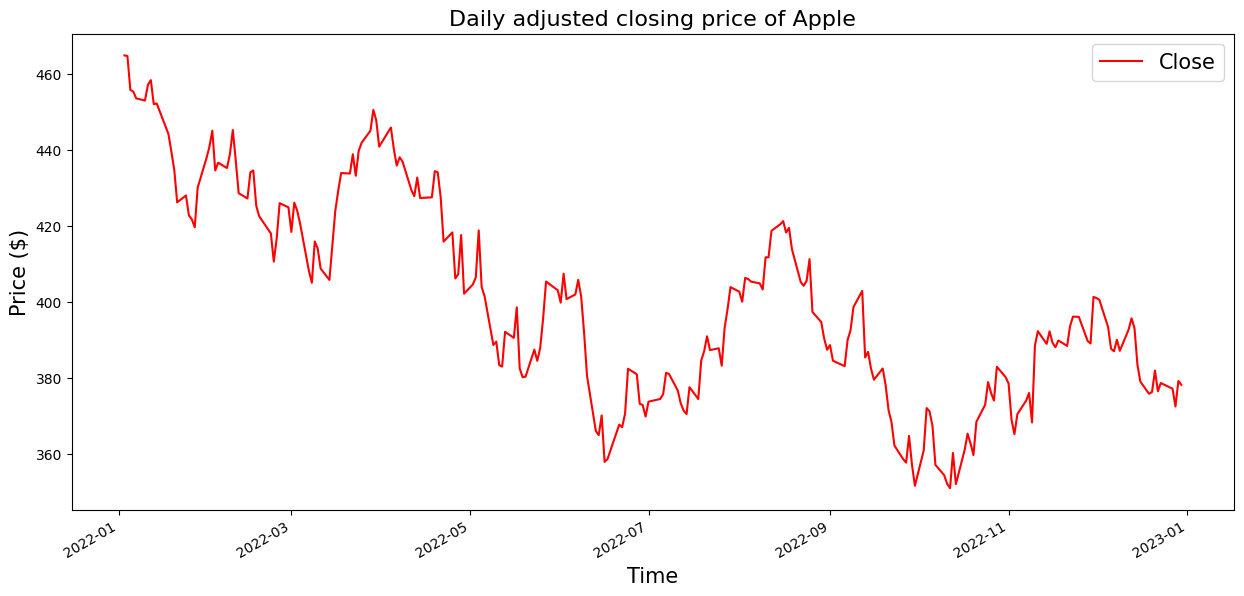

In [168]:
# plot the adj closing price
plt.figure(figsize=(15, 7))
df['Adj Close'].plot(color = 'r')

# set labels and sizes of the title and axis
plt.title('Daily adjusted closing price of Apple', fontsize=16)
plt.xlabel('Time', fontsize=15)
plt.ylabel('Price ($)', fontsize=15)
plt.legend(['Close'], prop={'size': 15})

# show the plot
plt.show()

In [169]:
# Only need the adjusted close prices
df = df[['Adj Close']]

# Exponential moving averages

In [170]:
# I will be using the EMA from the pandas_ta library. We can check the documentation for ta.ema()
help(ta.ema)

Help on function ema in module pandas_ta.overlap.ema:

ema(close, length=None, talib=None, offset=None, **kwargs)
    Exponential Moving Average (EMA)
    
    The Exponential Moving Average is more responsive moving average compared to the
    Simple Moving Average (SMA).  The weights are determined by alpha which is
    proportional to it's length.  There are several different methods of calculating
    EMA.  One method uses just the standard definition of EMA and another uses the
    SMA to generate the initial value for the rest of the calculation.
    
    Sources:
        https://stockcharts.com/school/doku.php?id=chart_school:technical_indicators:moving_averages
        https://www.investopedia.com/ask/answers/122314/what-exponential-moving-average-ema-formula-and-how-ema-calculated.asp
    
    Calculation:
        Default Inputs:
            length=10, adjust=False, sma=True
        if sma:
            sma_nth = close[0:length].sum() / length
            close[:length - 1] = n

In [171]:
df['EMA-9'] = ta.ema(df.loc[:,'Adj Close'], length = 9)
df['EMA-21'] = ta.ema(df.loc[:,'Adj Close'], length = 21)
df.head()

<ipython-input-171-6765f21bce7d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['EMA-9'] = ta.ema(df.loc[:,'Adj Close'], length = 9)
<ipython-input-171-6765f21bce7d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['EMA-21'] = ta.ema(df.loc[:,'Adj Close'], length = 21)


,Adj Close,EMA-9,EMA-21
Date,,,
2022-01-03,464.923370,NaN,NaN
2022-01-04,464.767670,NaN,NaN
2022-01-05,455.843170,NaN,NaN
2022-01-06,455.414917,NaN,NaN
2022-01-07,453.614380,NaN,NaN


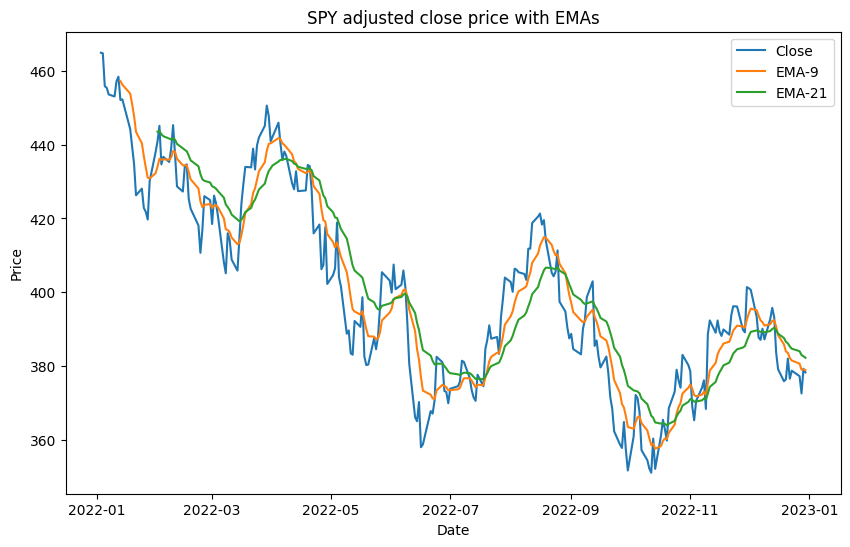

In [172]:
# Plot to see the EMAs
plt.figure(figsize = (10,6))
plt.plot(df['Adj Close'], label = 'Close')
plt.plot(df['EMA-9'], label = 'EMA-9')
plt.plot(df['EMA-21'], label ='EMA-21')
plt.title("SPY adjusted close price with EMAs")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()

# Implement trend following strategy and generate buy and sell signals

In [173]:
# Shift to the future by one day so that everyday uses the information up to
# yesterday to make a trading decision for tmr
df['EMA-9'] = df['EMA-9'].shift(1)
df['EMA-21'] = df['EMA-21'].shift(1)
df = df.dropna()
df.head()

<ipython-input-173-f45a2e93e7b0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['EMA-9'] = df['EMA-9'].shift(1)
<ipython-input-173-f45a2e93e7b0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['EMA-21'] = df['EMA-21'].shift(1)


,Adj Close,EMA-9,EMA-21
Date,,,
2022-02-02,445.108337,433.965848,443.512265
2022-02-03,434.646088,436.194346,443.657363
2022-02-04,436.689880,435.884694,442.838156
2022-02-07,435.288452,436.045731,442.279222
2022-02-08,438.869965,435.894276,441.643697


In [174]:
df['Signal'] = 0
# identify buy signal
df.loc[(df['EMA-9'] > df['EMA-21'])&(df['EMA-9'].shift(1)<df['EMA-21'].shift(1)), 'Signal'] = 1
# identify sell signal
df.loc[(df['EMA-9'] < df['EMA-21'])&(df['EMA-9'].shift(1)>df['EMA-21'].shift(1)), 'Signal'] = -1

<ipython-input-174-b6a9b1229397>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Signal'] = 0


In [175]:
df['Signal'].value_counts()

 0    222
 1      4
-1      4
Name: Signal, dtype: int64

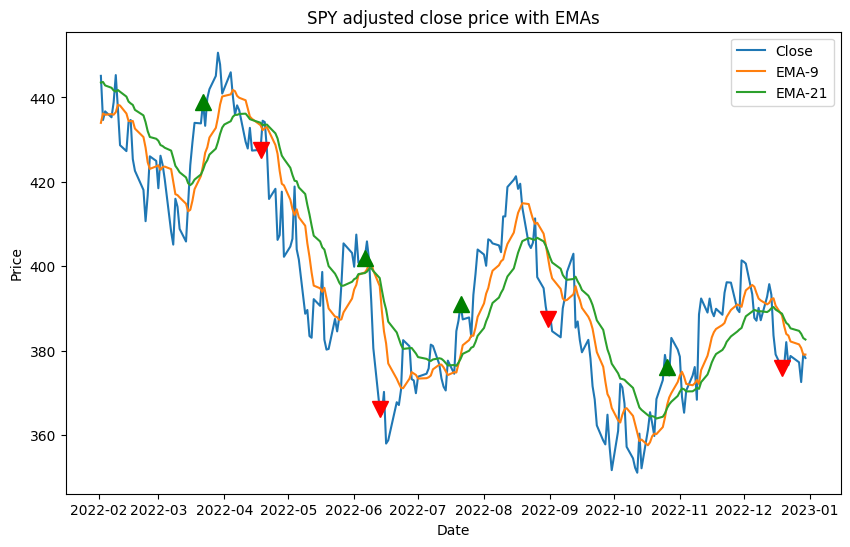

In [176]:
## Plot Signals for visualisation
plt.figure(figsize = (10,6))
plt.plot(df['Adj Close'], label = 'Close')
plt.plot(df['EMA-9'], label = 'EMA-9')
plt.plot(df['EMA-21'], label ='EMA-21')
plt.plot(df.loc[df['Signal'] == 1].index, df['Adj Close'][df['Signal'] == 1], '^',
         color = 'g', markersize = 12)
plt.plot(df.loc[df['Signal'] == -1].index, df['Adj Close'][df['Signal'] == -1], 'v',
         color = 'r', markersize = 12)
plt.title("SPY adjusted close price with EMAs")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()

In [177]:
# Calculate cumulative returns for Buy and Hold strategy
df['buy_and_hold_returns'] = df['Adj Close'].pct_change()
df['buy_and_hold_cum_returns'] = (1 + df['buy_and_hold_returns']).cumprod() -1

# Calculate cumulative returns for EMA trend following strategy:
df['stock_position'] = 0
# identify long position
df.loc[df['EMA-9'] > df['EMA-21'], 'stock_position'] = 1
# identify short position
df.loc[df['EMA-9'] < df['EMA-21'], 'stock_position'] = -1
df['EMA_returns'] = (df['Adj Close'].pct_change()) * df['stock_position']
df['EMA_cum_returns'] = (1 + df['EMA_returns']).cumprod()-1
df.head()

,Adj Close,EMA-9,EMA-21,Signal,buy_and_hold_returns,buy_and_hold_cum_returns,stock_position,EMA_returns,EMA_cum_returns
Date,,,,,,,,,
2022-02-02,445.108337,433.965848,443.512265,0,NaN,NaN,-1,NaN,NaN
2022-02-03,434.646088,436.194346,443.657363,0,-0.023505,-0.023505,-1,0.023505,0.023505
2022-02-04,436.689880,435.884694,442.838156,0,0.004702,-0.018913,-1,-0.004702,0.018692
2022-02-07,435.288452,436.045731,442.279222,0,-0.003209,-0.022062,-1,0.003209,0.021961
2022-02-08,438.869965,435.894276,441.643697,0,0.008228,-0.014015,-1,-0.008228,0.013553


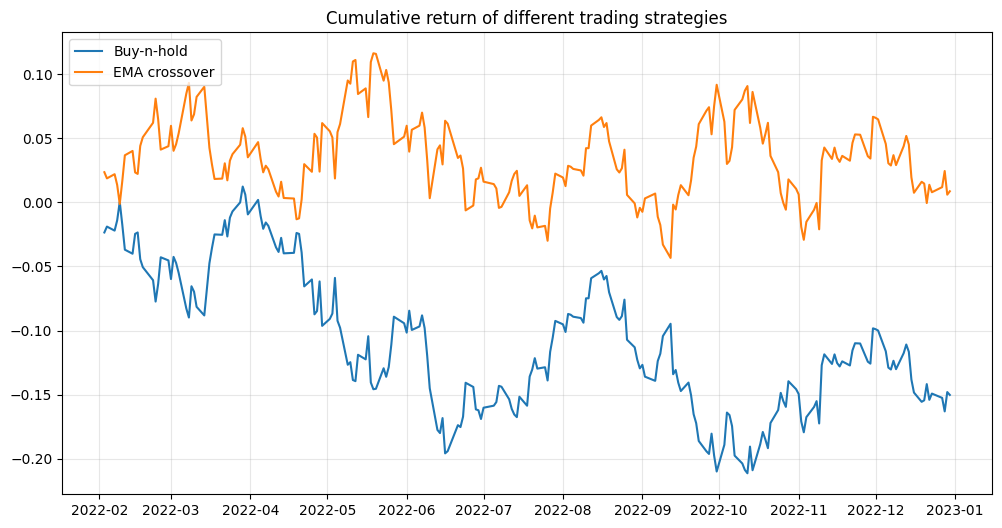

In [178]:
# plot cumulative return
plt.plot(df['buy_and_hold_cum_returns'], label='Buy-n-hold')
plt.plot(df['EMA_cum_returns'], label='EMA crossover')
plt.legend(loc=2)
plt.title("Cumulative return of different trading strategies")
plt.grid(True, alpha=.3)

In [179]:
# Compare terminal return at the end of one year period
EMA_terminal_return = df['EMA_cum_returns'].iloc[-1]*100
Buy_and_Hold_terminal_return = df['buy_and_hold_cum_returns'].iloc[-1]*100
print(f"EMA crossover strategy cumulative returns = {EMA_terminal_return}%")
print(f"Buy and hold strategy cumulative returns = {Buy_and_Hold_terminal_return}%")


EMA crossover strategy cumulative returns = 0.8639997419819911%
Buy and hold strategy cumulative returns = -15.024747502795632%


## Unfortunately, this strategy did not perform very well with only 0.86% returns over the 1 year